## Project Introduction
- The dataset includes images of cells infected with malaria and uninfected healthy cells.
- The goal of this project is to use these images to create a predictive model using a convolutional neural network that can predict whether or not a cell is infected with malaria.
- We begin by sampling some infected and uninfected cells to visually inspect any noticeable differences between the two classes of cells.
- Data augmentation was performed to increase the number of samples we have before feeding them into our model for training.
- The model was then applied to a randomly selected uninfected and infected cell image.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline
import os

In [2]:
data_dir = 'C:\\Users\\Charles\\Desktop\\cell_images'

In [3]:
os.listdir(data_dir)

['.ipynb_checkpoints',
 'Cell Classification using a Convolutional Neural Network.ipynb',
 'test',
 'train']

In [4]:
# Assigning training and testing directories
test_path = data_dir + '\\test\\'
train_path = data_dir + '\\train\\'

In [5]:
print(os.listdir(test_path))
print(os.listdir(train_path))

['parasitized', 'uninfected']
['parasitized', 'uninfected']


## Sampling Images of Infected Cells
- A couple uninfected and infected cell images were visually inspected.
- Infected cells have a noticeable dark purple/pink spot(s) located somewhere in the cell.
- Uninfected cells are devoid of these dark spot(s).

In [6]:
# Sampling images of infected cells
print(os.listdir(train_path + 'parasitized')[0])
print(os.listdir(train_path + 'parasitized')[1])

C100P61ThinF_IMG_20150918_144104_cell_162.png
C100P61ThinF_IMG_20150918_144104_cell_163.png


In [7]:
para_cell_0 = train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png'
para_cell_1 = train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_163.png'

In [8]:
print(imread(para_cell_0).shape)
print(imread(para_cell_1).shape)

(148, 142, 3)
(208, 148, 3)


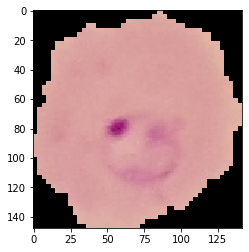

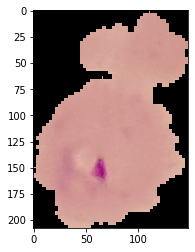

In [9]:
# Image of an infected cells
plt.figure()
columns = 2
plt.imshow(imread(para_cell_0))
plt.figure()
plt.imshow(imread(para_cell_1))
plt.show()

In [10]:
# Sampling images of uninfected cells
print(os.listdir(train_path + 'uninfected')[0])
print(os.listdir(train_path + 'uninfected')[1])

C100P61ThinF_IMG_20150918_144104_cell_128.png
C100P61ThinF_IMG_20150918_144104_cell_131.png


In [11]:
uninfected_cell_0 = train_path + 'uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_128.png'
uninfected_cell_1 = train_path + 'uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_131.png'

In [12]:
print(imread(uninfected_cell_0).shape)
print(imread(uninfected_cell_1).shape)

(139, 160, 3)
(136, 145, 3)


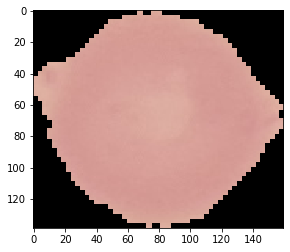

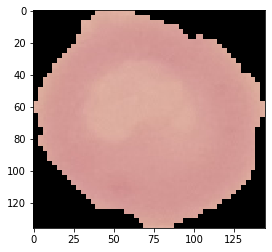

In [13]:
# Image of an uninfected cell
plt.figure()
plt.imshow(imread(uninfected_cell_0))
plt.figure()
plt.imshow(imread(uninfected_cell_1))
plt.show()

In [14]:
# Checking number of images in training dataset for parasitized and uninfected cells
print(len(os.listdir(train_path + 'parasitized')))
print(len(os.listdir(train_path + 'uninfected')))

12479
12479


In [15]:
# Checking dimensions off all training images
dim1 = []
dim2 = []

for image_filename in os.listdir(train_path + 'uninfected'):
    
    img = imread(train_path + 'uninfected\\' + image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

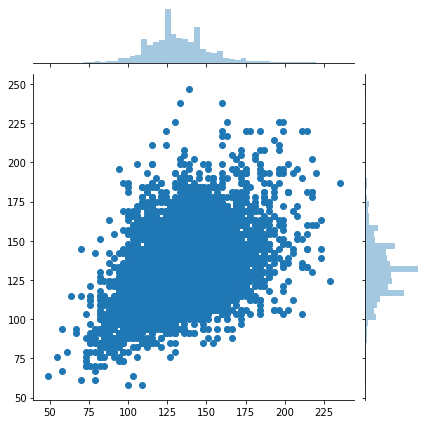

In [16]:
# Distribution of image sizes in training set
sns.jointplot(dim1, dim2)
plt.show()

In [17]:
# Average shape of images will be used for our model
print(np.mean(dim1))
print(np.mean(dim2))

131.64820899110507
131.4041990544114


In [18]:
image_shape = (131,131,3)

In [19]:
# Checking scale of images
print(imread(para_cell_0).max())
print(imread(para_cell_0).min())

0.9098039
0.0


## Data Augmentation
- We can artificially increase the sample size of our training data by augmenting our data set by manipulating the original images.
- Such transformations that are reasonable for these images include: stretching, zooming, rotating, etc.
- See parameters listed below for all transformations applied to images.

In [20]:
# Augmenting image data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

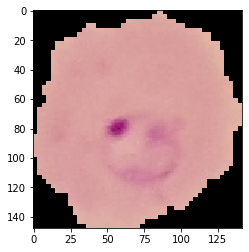

In [21]:
# Original para_cell_0 image
para_img = imread(para_cell_0)
plt.imshow(para_img)
plt.show()

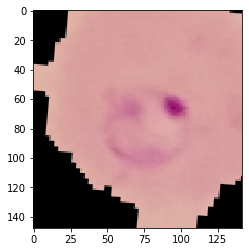

In [22]:
# Randomly generated transformed image based off image_gen above
plt.imshow(image_gen.random_transform(para_img))
plt.show()

In [23]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [24]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


## Building the Convolutional Neural Network
- Three convolutional layers were used in this model, each with a pooling layers.
- Rectivied linear unit activation functions were used for all layers except for the last output layer.
- After flattening, one hidden dense layers was added with a 0.5 dropout rate.

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [26]:
# Model architecture: (Conv2D + Pooling) x 3 -> Flatten -> Dense with 0.5 dropout -> Dense (output)
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 129, 129, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [29]:
batch_size = 16

In [30]:
image_shape

(131, 131, 3)

In [31]:
# Training image generator
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=True)

Found 24958 images belonging to 2 classes.


In [32]:
# Testing image generator
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [33]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [34]:
# Fitting model
results = model.fit_generator(train_image_gen, epochs=20,
                             validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 303s 194ms/step - loss: 0.6888 - accuracy: 0.5468 - val_loss: 0.6819 - val_accuracy: 0.5823
Epoch 2/20
1560/1560 [==============================] - 298s 191ms/step - loss: 0.4964 - accuracy: 0.7650 - val_loss: 0.3257 - val_accuracy: 0.9092
Epoch 3/20
1560/1560 [==============================] - 296s 189ms/step - loss: 0.2084 - accuracy: 0.9380 - val_loss: 0.1802 - val_accuracy: 0.9438
Epoch 4/20
1560/1560 [==============================] - 295s 189ms/step - loss: 0.1689 - accuracy: 0.9486 - val_loss: 0.1750 - val_accuracy: 0.9427
Epoch 5/20
1560/1560 [==============================] - 297s 190ms/step - loss: 0.1646 - accuracy: 0.9486 - val_loss: 0.1615 - val_accuracy: 0.9442
Epoch 6/20
1560/1560 [==============================] - 305s 195ms/step - loss: 0.1613 - accuracy: 0.9493 - val_loss: 0.1602 - val_accuracy: 0.9450
Epoch 7/20
1560/1560 [==============================] - 332s 213ms/step - loss: 0.1568 - accuracy: 0.9491 - val_

In [35]:
# Saving model
from tensorflow.keras.models import load_model
model.save('Cell_Classification_Model.h5')

## Model Evaluation
- Loss vs. validation loss was plotted to visually inspect the model was not overfitting to the training data.
- Training accuracy vs. validation accuracy was also plotted for a visual comparison.
- Classifcation report and confusion matrix were obtained to evaluate model.
- An overall accuracy of 95% was obtained with similarly good recall and precision.

In [118]:
df_model = pd.DataFrame(model.history.history)

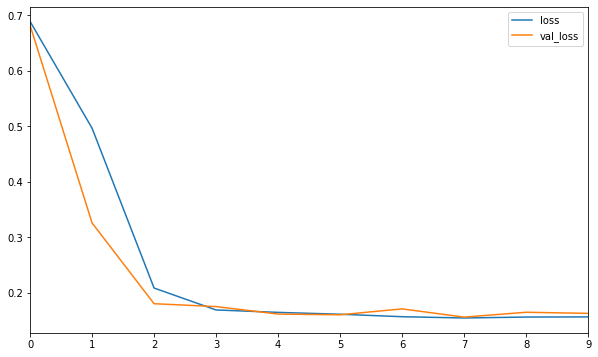

In [125]:
df_model[['loss', 'val_loss']].plot(figsize=(10,6))
plt.show()

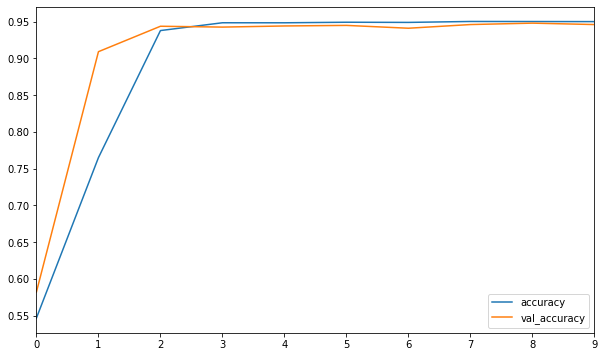

In [128]:
df_model[['accuracy', 'val_accuracy']].plot(figsize=(10,6))
plt.show()

In [36]:
# Quick evaluation of loss and accuracy
model.evaluate_generator(test_image_gen)

[0.15470450092535581, 0.94846153]

In [37]:
# Generating predictions
pred = model.predict_generator(test_image_gen)

In [38]:
# An array of probabilities are obtained
pred

array([[2.8391182e-03],
       [1.1861324e-04],
       [1.5661120e-04],
       ...,
       [9.6985078e-01],
       [9.7993004e-01],
       [9.2603958e-01]], dtype=float32)

In [39]:
# Generating an array of booleans
predictions = pred > 0.5

In [40]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [41]:
# Checking length of predictions
len(pred)

2600

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [44]:
# Overall accuracy of 95% was achieved through this model
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [117]:
print(confusion_matrix(test_image_gen.classes, predictions))

[[1226   74]
 [  57 1243]]


## Sample Predictions
- Random uninfected and infected cells were selected for testing our model.
- Each sample was loaded and displayed visually.
- Images were then fed into our model to make a prediction.

**Random Sample of an Infected Cell**

In [74]:
np.random.seed(19)
random_infected = int(np.random.randint(0, 1300, size=1))
print(os.listdir(test_path + 'parasitized')[random_infected])

C181P142ThinF_IMG_20151127_160434_cell_171.png


In [76]:
infected_cell_random = test_path + 'parasitized\\' + 'C181P142ThinF_IMG_20151127_160434_cell_171.png'

In [83]:
from tensorflow.keras.preprocessing import image

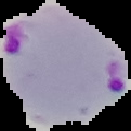

In [104]:
# Image of randomly selected infected cell
infected_cell_image = image.load_img(infected_cell_random, target_size=image_shape)
infected_cell_image

In [92]:
infected_cell_image_arr = image.img_to_array(infected_cell_image)

In [95]:
# Need to resahpe array so it can fit with our model parameters
infected_cell_image_arr.shape

(131, 131, 3)

In [96]:
infected_cell_image_arr = np.expand_dims(infected_cell_image_arr, axis=0) 

In [98]:
# Recheck shape
infected_cell_image_arr.shape

(1, 131, 131, 3)

*Model Prediction*

In [99]:
# Model predicts '0', which corresponds to a 'parasitized' cell (see next cell)
model.predict(infected_cell_image_arr)

array([[0.]], dtype=float32)

In [100]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

**Random Sample of an Uninfected Cell**

In [101]:
np.random.seed(20)
random_uninfected = int(np.random.randint(0, 1300, size=1))
print(os.listdir(test_path + 'uninfected')[random_uninfected])

C173P134NThinF_IMG_20151130_115733_cell_92.png


In [102]:
uninfected_cell_random = test_path + 'uninfected\\' + 'C173P134NThinF_IMG_20151130_115733_cell_92.png'

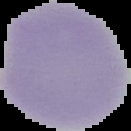

In [103]:
# Image of randomly selected uninfected cell
uninfected_cell_image = image.load_img(uninfected_cell_random, target_size=image_shape)
uninfected_cell_image

In [106]:
uninfected_cell_image_arr = image.img_to_array(uninfected_cell_image)

In [107]:
# Need to resahpe array so it can fit with our model parameters
uninfected_cell_image_arr.shape

(131, 131, 3)

In [115]:
uninfected_cell_image_arr = np.expand_dims(uninfected_cell_image_arr, axis=0) 

In [116]:
uninfected_cell_image_arr.shape

(1, 131, 131, 3)

*Model Prediction*

In [111]:
# Model predicts '1', which corresponds to a 'uninfected' cell (see next cell)
model.predict(uninfected_cell_image_arr)

array([[1.]], dtype=float32)

In [58]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}